In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Les données du dataset Boston

In [76]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shapes : {}".format(boston.data.shape))

Data shapes : (506, 13)


In [77]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

X.shape : (506, 104)


## Analyse du KNeighborsClassifier sur Forge

In [78]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\cobi-\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [79]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
print("test set predictions: {}".format(clf.predict(X_test)))

test set predictions: [1 0 1 0 1 0 0]


In [81]:
print("test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

test set accuracy: 0.86


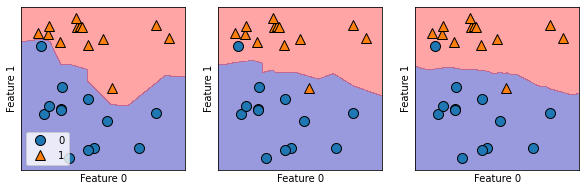

In [82]:
ig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha = .4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
    

## application du KNeighborsClassifier sur le dataset Cancer

In [83]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [84]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [85]:
print("sample counts per class :\n {}".format({
    n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
}))

sample counts per class :
 {'malignant': 212, 'benign': 357}


In [86]:
print("feature names :\n{}".format(cancer.feature_names))

feature names :
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [87]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [88]:
training_accuracy = []
test_accuracy = []
neigbors_settings = range(1, 11)

for n_neighbors in neigbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

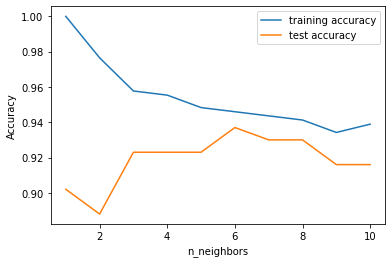

In [89]:
plt.plot(neigbors_settings, training_accuracy, label="training accuracy")
plt.plot(neigbors_settings, test_accuracy, label ="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Régresion avec K plus proche voisins

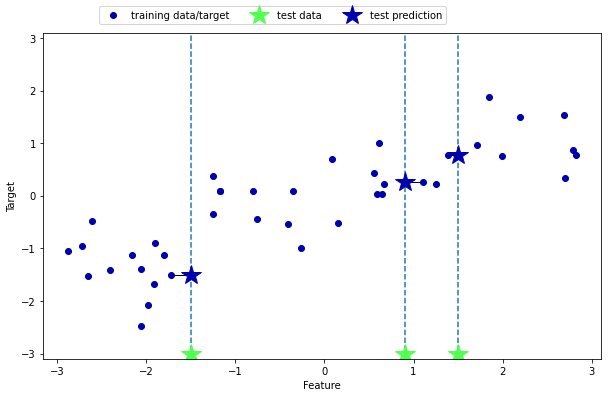

In [90]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

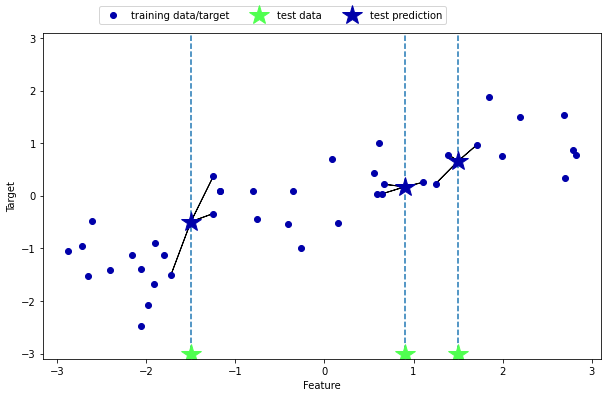

In [91]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [92]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3) #on créer le modele avec 3 voisin + proche

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0) #creation des set de training et de test

reg.fit(X_train, y_train) #on train le modele

KNeighborsRegressor(n_neighbors=3)

In [93]:
print("Test set prediction :\n{}".format(reg.predict(X_test))) #on utilise le modele sur le set de test pour faire les prédictions

Test set prediction :
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [94]:
print("test set R^2 : {:.2f}".format(reg.score(X_test, y_test))) #calcule du coef de déterminiation

test set R^2 : 0.83


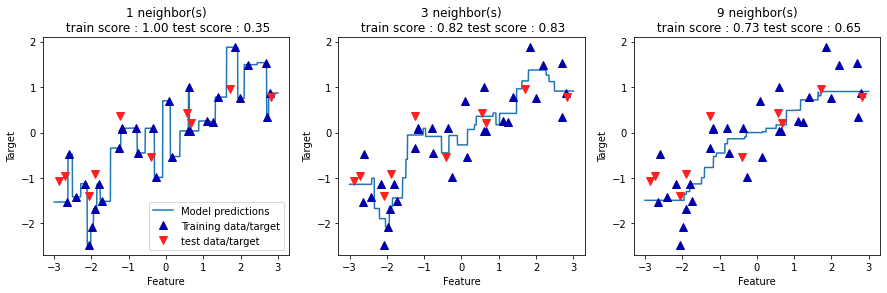

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score : {:.2f} test score : {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "test data/target"], loc="best")

## Modèle linéaires

### La régression linéaire

In [96]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [97]:
print("parametre de pente/coef = lr.coef_ : {}".format(lr.coef_))
print("Ordonnées à l'origine = lr.intercept_ : {}".format(lr.intercept_))

parametre de pente/coef = lr.coef_ : [0.39390555]
Ordonnées à l'origine = lr.intercept_ : -0.031804343026759746


In [98]:
print(" Training set score : {:.2f}".format(lr.score(X_train, y_train)))
print(" Test set score : {:.2f}".format(lr.score(X_test, y_test)))

 Training set score : 0.67
 Test set score : 0.66


In [99]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [100]:
print(" Training set score : {:.2f}".format(lr.score(X_train, y_train)))
print(" Test set score : {:.2f}".format(lr.score(X_test, y_test)))

 Training set score : 0.95
 Test set score : 0.61


Ici on a le signe d'un **surapprentissage**

### La régression ridge

Permet de réduire le surraprentissage en régularisant les données du modele

In [101]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print(" Training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print(" Test set score : {:.2f}".format(ridge.score(X_test, y_test)))

 Training set score : 0.89
 Test set score : 0.75


In [102]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train) #on change le coef alpha qui permet a l'utilisateur de 
#spécifier l'importance entre la simplicité et la perf
#valeur optimal d'alpha depend du jeu de données
#augmenter alpha = force les coef a se rapprocher de zéro ce qui fait décroitre les perf mais 
#peu aider a avoir un meilleur généralisation

print(" Training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print(" Test set score : {:.2f}".format(ridge.score(X_test, y_test)))

 Training set score : 0.93
 Test set score : 0.77


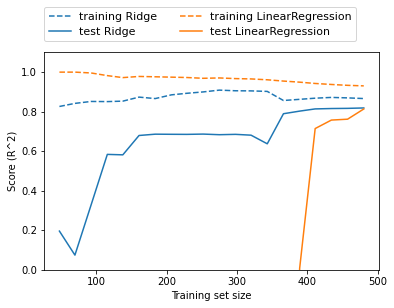

In [103]:
mglearn.plots.plot_ridge_n_samples()
#comparaison lineaire et ridge sur un coef 1 en fonction du nombre de parametre 

### La régression ridge

Permet de réduire le surraprentissage en régularisant les données du modele